In [ ]:
# python libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

(<matplotlib.image.AxesImage at 0x7f0c1714b710>, 1)

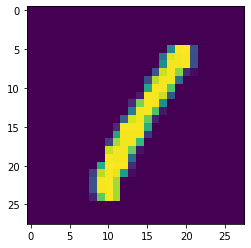

In [ ]:
# print(x_train.shape, x_train.min())

i = 3
plt.imshow(x_train[i]), y_train[i]

In [ ]:
# Preproccessing
images = x_train / 255.0
print(images.min(), images.max())
labels = pd.get_dummies(y_train)

0.0 1.0


In [ ]:
i = 1
y_train[i], np.array(labels[i])

(0, array([0, 0, 0, ..., 0, 0, 0], dtype=uint8))

In [ ]:
from tensorflow.keras import layers, Sequential

input_dim = 28 * 28
model = Sequential([
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam", loss=tf.losses.CategoricalCrossentropy(), metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience=2)
history = model.fit(images, labels, batch_size=128, epochs=10_000, validation_split=0.3, callbacks=[early_stop])

Epoch 1/10000
329/329 [==============================] - 7s 20ms/step - loss: 0.2836 - accuracy: 0.9144 - val_loss: 0.1664 - val_accuracy: 0.9509
Epoch 2/10000
329/329 [==============================] - 6s 17ms/step - loss: 0.1022 - accuracy: 0.9696 - val_loss: 0.1170 - val_accuracy: 0.9655
Epoch 3/10000
329/329 [==============================] - 6s 18ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.1102 - val_accuracy: 0.9697
Epoch 4/10000
329/329 [==============================] - 6s 18ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0998 - val_accuracy: 0.9723
Epoch 5/10000
329/329 [==============================] - 6s 17ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.1062 - val_accuracy: 0.9716
Epoch 6/10000
329/329 [==============================] - 6s 18ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.1123 - val_accuracy: 0.9707


In [ ]:
pd.DataFrame(history.history).plot()

NameError: ignored

In [ ]:
test_images = x_test / 255.0
test_labels = pd.get_dummies(y_test)

In [ ]:
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
np.mean(np.equal(predictions, y_test))

313/313 [==============================] - 1s 4ms/step


0.9786

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
mat = confusion_matrix(y_test, predictions)

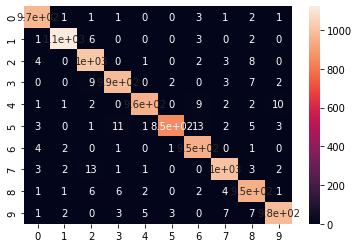

In [ ]:
sns.heatmap(mat, annot=True)